In [2]:
# Load Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd 

from sklearn.model_selection import train_test_split
from scipy import stats

from multiprocessing import cpu_count

# Eliminar Variables No Informadas

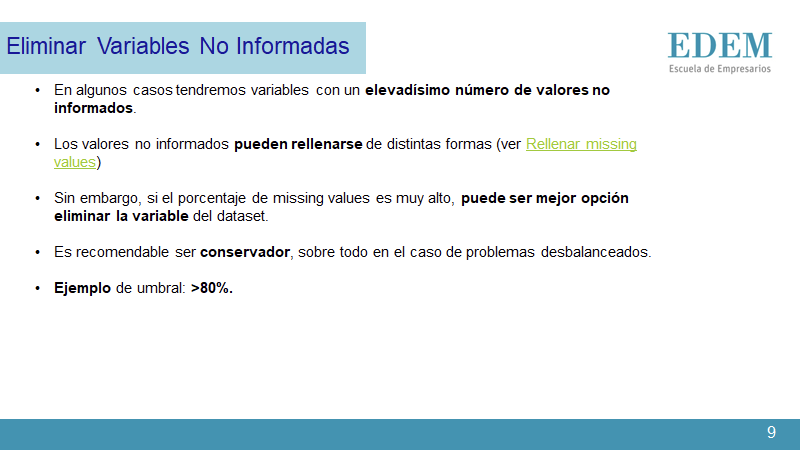

La mayoría de los modelos de aprendizaje automático no tienen en cuenta los valores que faltan en los datos de entrada. 

En las variables categóricas, los valores que faltan pueden transformarse en una nueva categoría "Falta", resolviendo así el problema.

En el caso de las variables numéricas, estos valores perdidos pueden rellenarse utilizando diferentes enfoques (véase el cuaderno 5), pero si una variable tiene demasiados valores perdidos, estos enfoques dejan de ser útiles y lo mejor sería eliminar la variable por completo del conjunto de datos.

Veamos aquí cómo seleccionar variables con demasiados valores perdidos y eliminarlas de nuestro conjunto de datos.

## Load Data

In [3]:
dat = pd.read_csv("../datasets/i2.csv", sep = ";")
dat.head()

,user,booking_date,origin_airport,price,sales channel,ant,airline
0,user5,01/11/2018,MAD,NaN,online,NaN,i2
1,user7,01/11/2018,DUB,147.500000,online,38.0,i2
2,user4,02/11/2018,TFS,24.049999,online,19.0,i2
3,user8,29/10/2018,MAD,59.709999,online,8.0,i2
4,user7,01/11/2018,NaN,37.299999,call center,4.0,i2


## Detectar Missing Values

Contemos el número de valores perdidos de cada variable del conjunto de datos.

In [3]:
dat.apply(lambda x: 100*np.sum(x.isna())/len(x))

user               0.0
booking_date       0.0
origin_airport     0.4
price             57.9
sales channel      0.0
ant                0.5
airline            0.0
dtype: float64

El precio tiene un 57,9% de valores perdidos. Tal vez sea mejor eliminarlo del conjunto de datos...

## Detectar Variables No Informadas

De forma más general, podemos detectar variables no informadas en un conjunto de datos definiendo un umbral, por ejemplo, 50%, y haciendo esto:

In [11]:
missing_values_threshold = 50 # You should try different values on a real problem.

In [12]:
non_informed_variables = dat.columns.values[dat.apply(lambda x: 100*np.sum(x.isna())/len(x)) >= missing_values_threshold].tolist()
non_informed_variables

['price']

## Eliminar Variables No Informadas

Utilicemos la lista calculada anteriormente con nombres de columnas no informados para eliminar estas variables de nuestro conjunto de datos.

In [13]:
new_dat = dat.drop(non_informed_variables, axis = 1)
new_dat

,user,booking_date,origin_airport,sales channel,ant,airline
0,user5,01/11/2018,MAD,online,NaN,i2
1,user7,01/11/2018,DUB,online,38.0,i2
2,user4,02/11/2018,TFS,online,19.0,i2
3,user8,29/10/2018,MAD,online,8.0,i2
4,user7,01/11/2018,NaN,call center,4.0,i2
...,...,...,...,...,...,...
995,user2,01/11/2018,JMK,online,29.0,i2
996,user10,01/11/2018,SVQ,online,39.0,i2
997,user4,30/10/2018,MAD,online,5.0,i2
998,user10,02/11/2018,CDG,online,4.0,i2


## Definir Función

Creemos nuestra propia función personalizada para eliminar variables no informadas.

In [ ]:
def count_nas(x): 
    ret = 100*np.sum(x.isna())/len(x)
    return ret

In [17]:
def remove_non_informed(X, missing_values_threshold = 50):
    non_informed_variables = X.columns.values[X.apply(lambda x: 100*np.sum(x.isna())/len(x)) >= missing_values_threshold].tolist()
    X = X.drop(non_informed_variables, axis = 1)
    print('Variables ' + str(non_informed_variables) + ' have been removed from dataset.')
    return X;
                                    
                                                                                        

In [18]:
new_dat = remove_non_informed(dat)
new_dat.head()

Variables ['price'] have been removed from dataset.


,user,booking_date,origin_airport,sales channel,ant,airline
0,user5,01/11/2018,MAD,online,NaN,i2
1,user7,01/11/2018,DUB,online,38.0,i2
2,user4,02/11/2018,TFS,online,19.0,i2
3,user8,29/10/2018,MAD,online,8.0,i2
4,user7,01/11/2018,NaN,call center,4.0,i2


In [19]:
new_dat = remove_non_informed(dat, missing_values_threshold = 60)
new_dat.head()

Variables [] have been removed from dataset.


,user,booking_date,origin_airport,price,sales channel,ant,airline
0,user5,01/11/2018,MAD,NaN,online,NaN,i2
1,user7,01/11/2018,DUB,147.500000,online,38.0,i2
2,user4,02/11/2018,TFS,24.049999,online,19.0,i2
3,user8,29/10/2018,MAD,59.709999,online,8.0,i2
4,user7,01/11/2018,NaN,37.299999,call center,4.0,i2
